In [2]:
# Cell 1: Import core libraries

import numpy as np            # for random numbers and numerical operations
import pandas as pd           # for data manipulation and analysis
import matplotlib.pyplot as plt  # for basic plotting
import seaborn as sns         # for nicer statistical plots

%matplotlib inline


In [3]:
# Cell 2: Set visual style for plots

sns.set(style="whitegrid")  # use a clean style with grid lines
plt.rcParams["figure.figsize"] = (10, 5)  # default plot size


In [4]:
# Cell 3: Generate a synthetic retail sales dataset

# Set a seed for reproducibility: you get the same random data every run
np.random.seed(42)

n_rows = 5000  # number of orders to simulate

# 1. Generate basic fields
order_ids = np.arange(1, n_rows + 1)

# Create random dates in 2023
date_range = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
order_dates = np.random.choice(date_range, size=n_rows)

# Customer IDs (simulate 800 unique customers)
customer_ids = np.random.choice(np.arange(1000, 1800), size=n_rows)

regions = np.random.choice(
    ["North", "South", "East", "West"],
    size=n_rows,
    p=[0.25, 0.25, 0.25, 0.25]  # equal probability for simplicity
)

product_categories = np.random.choice(
    ["Electronics", "Furniture", "Office Supplies", "Clothing"],
    size=n_rows,
    p=[0.35, 0.25, 0.25, 0.15]  # more electronics
)

# Sub-categories depending on category
subcategory_map = {
    "Electronics": ["Laptop", "Smartphone", "Headphones", "Monitor"],
    "Furniture": ["Chair", "Desk", "Cabinet", "Sofa"],
    "Office Supplies": ["Paper", "Pen", "Stapler", "Notebook"],
    "Clothing": ["T-Shirt", "Jeans", "Jacket", "Shoes"],
}

sub_categories = [np.random.choice(subcategory_map[cat]) for cat in product_categories]

# 2. Prices, quantities, discounts
base_price_map = {
    "Laptop": 1200,
    "Smartphone": 800,
    "Headphones": 100,
    "Monitor": 300,
    "Chair": 150,
    "Desk": 400,
    "Cabinet": 350,
    "Sofa": 900,
    "Paper": 10,
    "Pen": 2,
    "Stapler": 15,
    "Notebook": 5,
    "T-Shirt": 20,
    "Jeans": 50,
    "Jacket": 100,
    "Shoes": 80,
}

# Get base prices for each row
unit_prices = np.array([base_price_map[sub] for sub in sub_categories])

# Quantity between 1 and 10
quantities = np.random.randint(1, 11, size=n_rows)

# Discount between 0% and 30%
discounts = np.round(np.random.uniform(0, 0.3, size=n_rows), 2)

# 3. Calculate revenue and cost/profit
gross_sales = unit_prices * quantities
net_sales = gross_sales * (1 - discounts)

# Assume cost is 65% of unit price (just a guess)
costs = gross_sales * 0.65
profits = net_sales - costs

# 4. Create DataFrame
data = pd.DataFrame({
    "order_id": order_ids,
    "order_date": order_dates,
    "customer_id": customer_ids,
    "region": regions,
    "category": product_categories,
    "sub_category": sub_categories,
    "unit_price": unit_prices,
    "quantity": quantities,
    "discount": discounts,
    "gross_sales": gross_sales,
    "net_sales": net_sales,
    "cost": costs,
    "profit": profits
})

data.head()


,order_id,order_date,customer_id,region,category,sub_category,unit_price,quantity,discount,gross_sales,net_sales,cost,profit
0,1,2023-04-13,1567,East,Electronics,Laptop,1200,10,0.22,12000,9360.0,7800.0,1560.0
1,2,2023-12-15,1059,West,Electronics,Headphones,100,4,0.18,400,328.0,260.0,68.0
2,3,2023-09-28,1649,South,Clothing,Jeans,50,5,0.03,250,242.5,162.5,80.0
3,4,2023-04-17,1038,East,Electronics,Monitor,300,5,0.24,1500,1140.0,975.0,165.0
4,5,2023-03-13,1539,West,Clothing,Jeans,50,7,0.02,350,343.0,227.5,115.5


In [5]:
# Cell 4: High-level information about the dataset

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      5000 non-null   int64         
 1   order_date    5000 non-null   datetime64[ns]
 2   customer_id   5000 non-null   int64         
 3   region        5000 non-null   object        
 4   category      5000 non-null   object        
 5   sub_category  5000 non-null   object        
 6   unit_price    5000 non-null   int64         
 7   quantity      5000 non-null   int32         
 8   discount      5000 non-null   float64       
 9   gross_sales   5000 non-null   int64         
 10  net_sales     5000 non-null   float64       
 11  cost          5000 non-null   float64       
 12  profit        5000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(3)
memory usage: 488.4+ KB


In [8]:
# Cell 5: Summary statistics for numeric variables

data.describe().T  # .T = transpose, easier to read


,count,mean,min,25%,50%,75%,max,std
order_id,5000.0,2500.5,1.0,1250.75,2500.5,3750.25,5000.0,1443.520003
order_date,5000,2023-07-01 12:02:35.520000,2023-01-01 00:00:00,2023-04-03 00:00:00,2023-06-28 00:00:00,2023-10-01 00:00:00,2023-12-31 00:00:00,NaN
customer_id,5000.0,1397.461,1000.0,1197.0,1395.0,1598.0,1799.0,229.881114
unit_price,5000.0,335.8798,2.0,20.0,150.0,400.0,1200.0,386.266031
quantity,5000.0,5.5348,1.0,3.0,5.0,8.0,10.0,2.842253
discount,5000.0,0.1526,0.0,0.08,0.15,0.23,0.3,0.086906
gross_sales,5000.0,1870.6886,2.0,100.0,700.0,2450.0,12000.0,2613.0497
net_sales,5000.0,1589.060302,1.42,86.325,592.25,2184.0,11880.0,2240.772223
cost,5000.0,1215.94759,1.3,65.0,455.0,1592.5,7800.0,1698.482305
profit,5000.0,373.112712,0.12,18.0,120.0,456.75,4080.0,594.947356


In [9]:
# Cell 6: Check for missing values

data.isna().sum()


order_id        0
order_date      0
customer_id     0
region          0
category        0
sub_category    0
unit_price      0
quantity        0
discount        0
gross_sales     0
net_sales       0
cost            0
profit          0
dtype: int64

In [10]:
# Cell 7: Distribution of some categorical columns

print("Region value counts:")
print(data["region"].value_counts(), "\n")

print("Category value counts:")
print(data["category"].value_counts(), "\n")

print("Sub-category value counts (top 10):")
print(data["sub_category"].value_counts().head(10))


Region value counts:
region
South    1311
East     1258
West     1246
North    1185
Name: count, dtype: int64 

Category value counts:
category
Electronics        1730
Furniture          1279
Office Supplies    1224
Clothing            767
Name: count, dtype: int64 

Sub-category value counts (top 10):
sub_category
Monitor       445
Laptop        435
Smartphone    433
Headphones    417
Cabinet       327
Desk          321
Sofa          321
Stapler       320
Notebook      317
Chair         310
Name: count, dtype: int64


In [11]:
# Cell 8: Convert order_date to datetime and create new time features

# Ensure correct dtype
data["order_date"] = pd.to_datetime(data["order_date"])

# Create extra columns
data["order_year"] = data["order_date"].dt.year
data["order_month"] = data["order_date"].dt.month
data["order_month_name"] = data["order_date"].dt.strftime("%b")
data["order_weekday"] = data["order_date"].dt.day_name()
data["order_week"] = data["order_date"].dt.isocalendar().week

data[["order_date", "order_year", "order_month", "order_month_name", "order_weekday"]].head()


,order_date,order_year,order_month,order_month_name,order_weekday
0,2023-04-13,2023,4,Apr,Thursday
1,2023-12-15,2023,12,Dec,Friday
2,2023-09-28,2023,9,Sep,Thursday
3,2023-04-17,2023,4,Apr,Monday
4,2023-03-13,2023,3,Mar,Monday


In [12]:
# Cell 9: Sort data by order_date

data = data.sort_values("order_date").reset_index(drop=True)
data.head()


,order_id,order_date,customer_id,region,category,sub_category,unit_price,quantity,discount,gross_sales,net_sales,cost,profit,order_year,order_month,order_month_name,order_weekday,order_week
0,1165,2023-01-01,1155,North,Office Supplies,Paper,10,3,0.12,30,26.4,19.5,6.9,2023,1,Jan,Sunday,52
1,992,2023-01-01,1111,East,Furniture,Chair,150,9,0.16,1350,1134.0,877.5,256.5,2023,1,Jan,Sunday,52
2,3581,2023-01-01,1766,West,Clothing,Shoes,80,2,0.24,160,121.6,104.0,17.6,2023,1,Jan,Sunday,52
3,3072,2023-01-01,1236,West,Clothing,Jeans,50,9,0.03,450,436.5,292.5,144.0,2023,1,Jan,Sunday,52
4,2011,2023-01-01,1149,South,Electronics,Monitor,300,4,0.23,1200,924.0,780.0,144.0,2023,1,Jan,Sunday,52


In [13]:
# Cell 10: Overall revenue and profit

total_gross_sales = data["gross_sales"].sum()
total_net_sales = data["net_sales"].sum()
total_profit = data["profit"].sum()
avg_discount = data["discount"].mean()
avg_order_value = data["net_sales"].mean()

print(f"Total Gross Sales: ${total_gross_sales:,.2f}")
print(f"Total Net Sales:   ${total_net_sales:,.2f}")
print(f"Total Profit:      ${total_profit:,.2f}")
print(f"Average Discount:  {avg_discount:.2%}")
print(f"Average Order Value (Net): ${avg_order_value:,.2f}")


Total Gross Sales: $9,353,443.00
Total Net Sales:   $7,945,301.51
Total Profit:      $1,865,563.56
Average Discount:  15.26%
Average Order Value (Net): $1,589.06


In [14]:
# Cell 11: Revenue and profit by month

monthly_perf = (
    data
    .groupby("order_month_name", sort=False)[["net_sales", "profit"]]
    .sum()
    .reset_index()
)

monthly_perf


,order_month_name,net_sales,profit
0,Jan,723492.80,173311.35
1,Feb,617629.69,145147.29
2,Mar,625343.41,144465.61
3,Apr,769275.25,183243.70
4,May,633546.46,152222.76
5,Jun,646111.68,144301.93
6,Jul,589190.75,142640.10
7,Aug,708433.37,165533.22
8,Sep,627740.72,145190.47
9,Oct,605343.97,144957.42


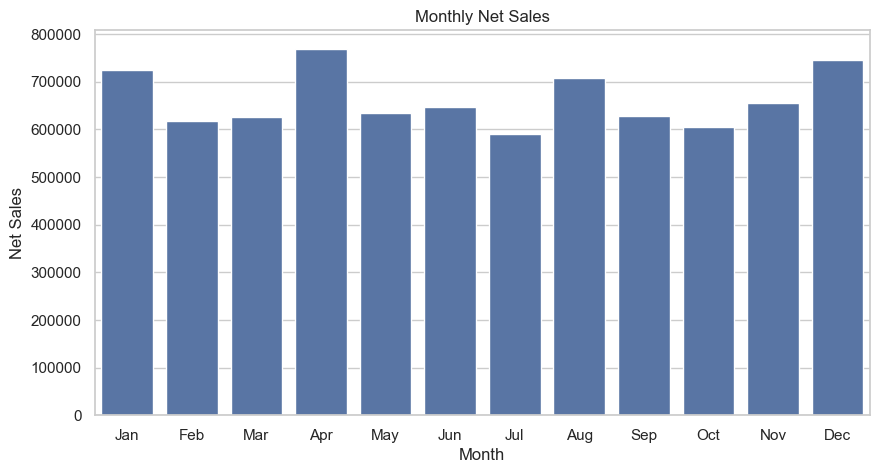

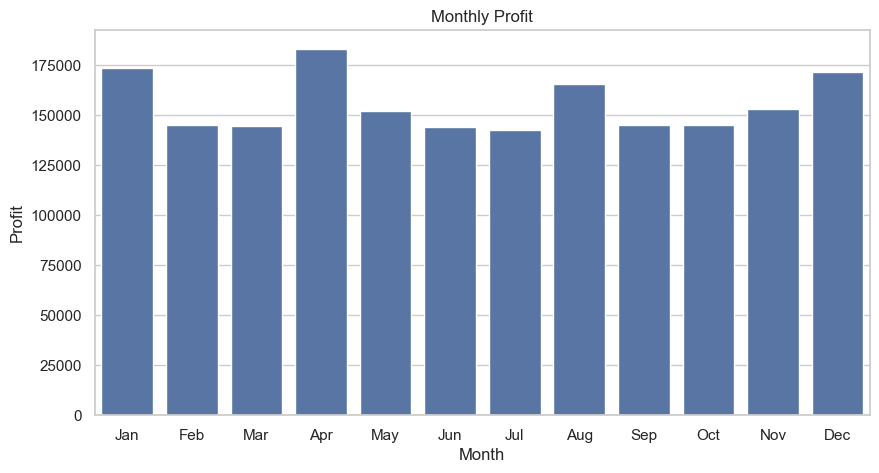

In [15]:
# Cell 12: Bar plot of monthly net sales and profit

fig, ax1 = plt.subplots()

sns.barplot(
    data=monthly_perf,
    x="order_month_name",
    y="net_sales",
    ax=ax1
)
ax1.set_title("Monthly Net Sales")
ax1.set_xlabel("Month")
ax1.set_ylabel("Net Sales")

plt.show()

fig, ax2 = plt.subplots()

sns.barplot(
    data=monthly_perf,
    x="order_month_name",
    y="profit",
    ax=ax2
)
ax2.set_title("Monthly Profit")
ax2.set_xlabel("Month")
ax2.set_ylabel("Profit")

plt.show()


In [16]:
# Cell 13: Net sales by region

region_perf = (
    data
    .groupby("region")[["net_sales", "profit"]]
    .sum()
    .sort_values("net_sales", ascending=False)
)

region_perf


,net_sales,profit
region,,
West,2095346.58,486831.23
East,2028835.52,477293.32
South,1956021.06,470161.36
North,1865098.35,431277.65


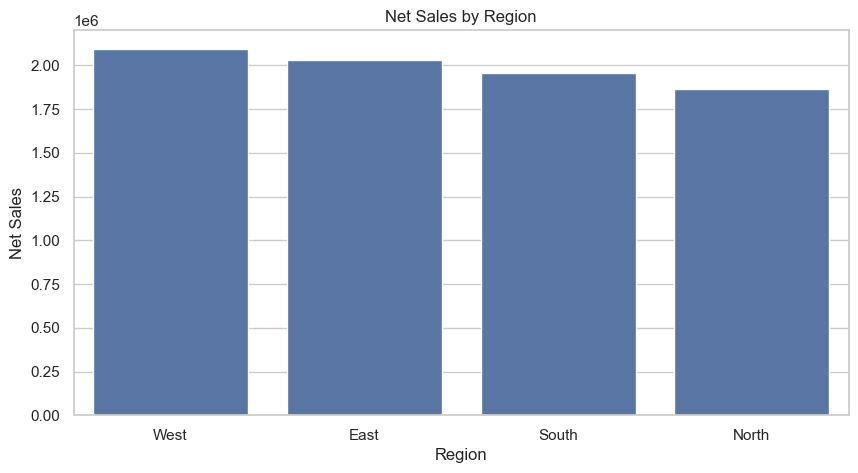

In [17]:
# Cell 14: Bar plot of net sales by region

region_perf_reset = region_perf.reset_index()

sns.barplot(
    data=region_perf_reset,
    x="region",
    y="net_sales"
)
plt.title("Net Sales by Region")
plt.xlabel("Region")
plt.ylabel("Net Sales")
plt.show()


In [18]:
# Cell 15: Net sales and profit by product category

category_perf = (
    data
    .groupby("category")[["gross_sales", "net_sales", "profit"]]
    .sum()
    .sort_values("net_sales", ascending=False)
)

category_perf


,gross_sales,net_sales,profit
category,,,
Electronics,5856600,4976369.00,1169579.00
Furniture,3184750,2706524.00,636436.50
Clothing,256830,215529.80,48590.30
Office Supplies,55263,46878.71,10957.76


In [19]:
# Cell 16: Top 10 customers by net sales

customer_perf = (
    data
    .groupby("customer_id")[["net_sales", "profit"]]
    .sum()
    .sort_values("net_sales", ascending=False)
    .head(10)
)

customer_perf


,net_sales,profit
customer_id,,
1657,39541.45,8689.20
1737,35857.51,7941.96
1332,34830.10,7712.10
1078,33581.00,7615.45
1343,33213.75,10486.50
1721,32856.44,7300.39
1784,30976.72,9330.42
1608,30458.30,8182.80
1438,30262.82,7752.02


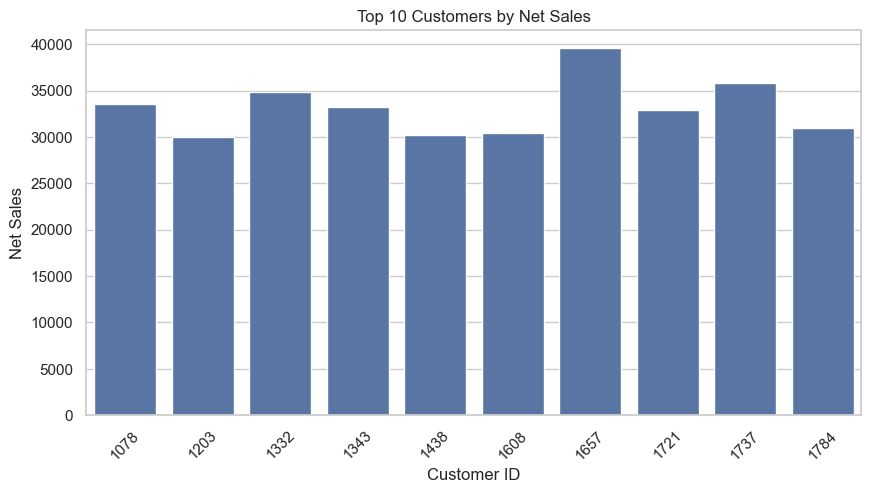

In [20]:
# Cell 17: Plot top 10 customers by net sales

customer_perf_reset = customer_perf.reset_index()

sns.barplot(
    data=customer_perf_reset,
    x="customer_id",
    y="net_sales"
)
plt.title("Top 10 Customers by Net Sales")
plt.xlabel("Customer ID")
plt.ylabel("Net Sales")
plt.xticks(rotation=45)
plt.show()


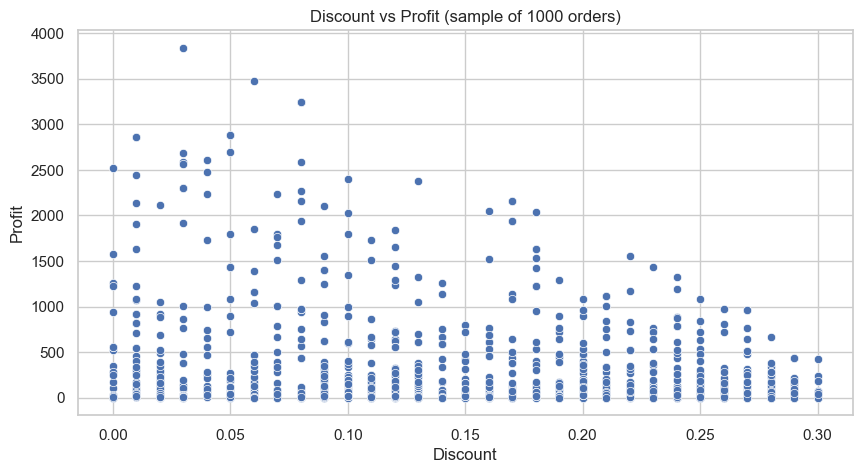

In [21]:
# Cell 18: Scatter plot of discount vs profit

sns.scatterplot(
    data=data.sample(1000, random_state=42),  # sample to avoid overplotting
    x="discount",
    y="profit"
)
plt.title("Discount vs Profit (sample of 1000 orders)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


In [22]:
# Cell 19: Orders and net sales by weekday

weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

weekday_perf = (
    data
    .groupby("order_weekday")
    .agg(
        orders=("order_id", "count"),
        net_sales=("net_sales", "sum")
    )
    .reindex(weekday_order)  # reorder rows logically
)

weekday_perf


,orders,net_sales
order_weekday,,
Monday,708,1062531.44
Tuesday,695,1070447.80
Wednesday,681,1023480.27
Thursday,728,1209417.94
Friday,737,1211951.65
Saturday,734,1195404.00
Sunday,717,1172068.41


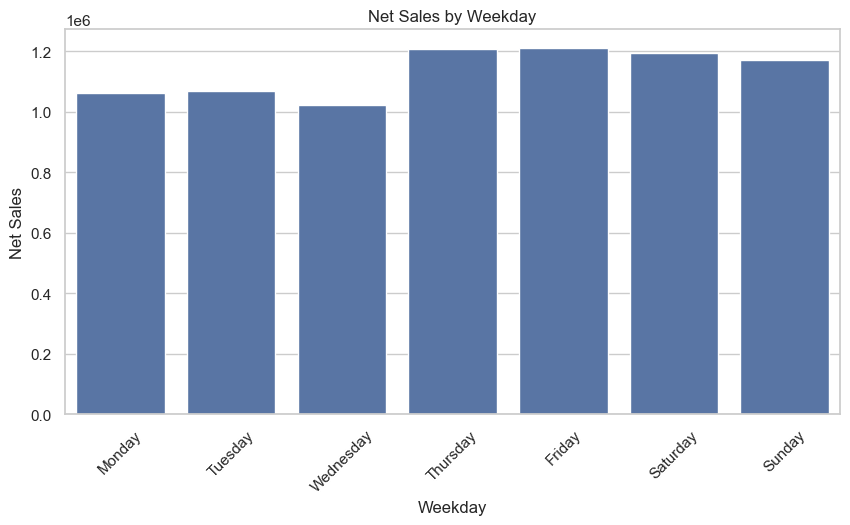

In [23]:
# Cell 20: Bar plot of net sales by weekday

weekday_perf_reset = weekday_perf.reset_index()

sns.barplot(
    data=weekday_perf_reset,
    x="order_weekday",
    y="net_sales"
)
plt.title("Net Sales by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Net Sales")
plt.xticks(rotation=45)
plt.show()
